# Ship waves

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from matplotlib.patches import Polygon
from matplotlib.lines import Line2D 
from scipy.constants import G, pi, e, h, c, m_e, m_p, epsilon_0, mu_0, g
from sympy import cot
import io
# from fpdf import FPDF
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Table, TableStyle, Image
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib import colors

In [2]:
# c = canvas.Canvas("Ricanau Mofo.pdf", pagesize=letter)

# Add content to the PDF (e.g., text, calculations)
# c.drawString(100, 700, "PDF Report")
# c.drawString(100, 650, "Calculation 1: 5 + 3 = 8")


In [3]:
# Create a PDF document
pdf_filename = "Ricanau_Mofo.pdf"
doc = SimpleDocTemplate(pdf_filename, pagesize=letter)

# Create a list to hold the content for the PDF
story = []

# Define custom styles for section headings
styles = getSampleStyleSheet()
section_heading_style = styles["Heading1"]
section_heading_style.textColor = colors.blue
sub_section_heading_style = styles["Heading2"]
sub_section_heading_style.textColor = colors.blue
sub_section_heading_style.leftIndent = 20  # Set the left indent for subsections

# Define table style
table_style = TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), colors.black),  # Header row background color
    ('TEXTCOLOR', (0, 0), (-1, 0), colors.white),  # Header row text color
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),  # Center align all cells
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),  # Header font
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),  # Header padding
    ('BACKGROUND', (0, 1), (-1, -1), colors.white),  # Table data background color
    ('GRID', (0, 0), (-1, -1), 1, colors.white),  # Table grid color
    ('BOX', (0, 0), (-1, -1), 2, colors.white),  # Table border
])


In [4]:
# Add a section to the PDF
section_title = "1. Introduction"
story.append(Paragraph(section_title, section_heading_style))

# Add content to the section
section_content = "In this document, the contribution of the ship waves on the bank erosion is determined."
story.append(Paragraph(section_content, styles["Normal"]))
story.append(Spacer(1, 12))  # Add some space between sections


## General Parameters

In [39]:
# Add another section
section_title = "2. General Parameters"
story.append(Paragraph(section_title, section_heading_style))

# Add content to the section
section_content = ""
story.append(Paragraph(section_content, styles["Normal"]))
story.append(Spacer(1, 12))

data = [
    ["Parameter", "Value", "Unit"],
    ["River width (w)", "100", "m"],
    ["River depth (d)", "9", "m"],
    ["Vessel speed (V_s)", "18.5", "km/h"],
    ["Vessel width (V_w)", "15", "m"],
    ["Vessel length (V_l)", "120", "m"],
    ["Vessel total height (V_h)", "12", "m"],
    ["Vessel drought (V_d)", "5", "m"],
]
table = Table(data)

table.setStyle(table_style)
story.append(table) 

# General parameters

#River
river_width = 100            # meters
river_depth = 9             # meters

#Varying river depth over width during HW
num_points = 26
depth_data = [0, 0.5, 2, 3, 5, 6, 6, 6, 7, 7, 7, 8, 8, 9, 9, 9, 9, 9, 8, 8, 8, 7, 6, 5, 2, 0]  # Depth of the river at different points


#Vessel
vessel_speed = 18.5          # km/h
vessel_width = 15            # meters
vessel_length = 120          # meters
vessel_total_height = 12     # meters (total height of the vessel)
vessel_drought = 5          # meters (drought is the submerged depth)

ζ = 1.2                      # coefficient of proportionality of the ship's geometry

#Waves
β = 55                       # degrees at which the waves reach the bank

#Bank
α = 1/5                      # slope angle of bank
s = 70                       # distance ship to bank in meters

## Cross-section Cottica River

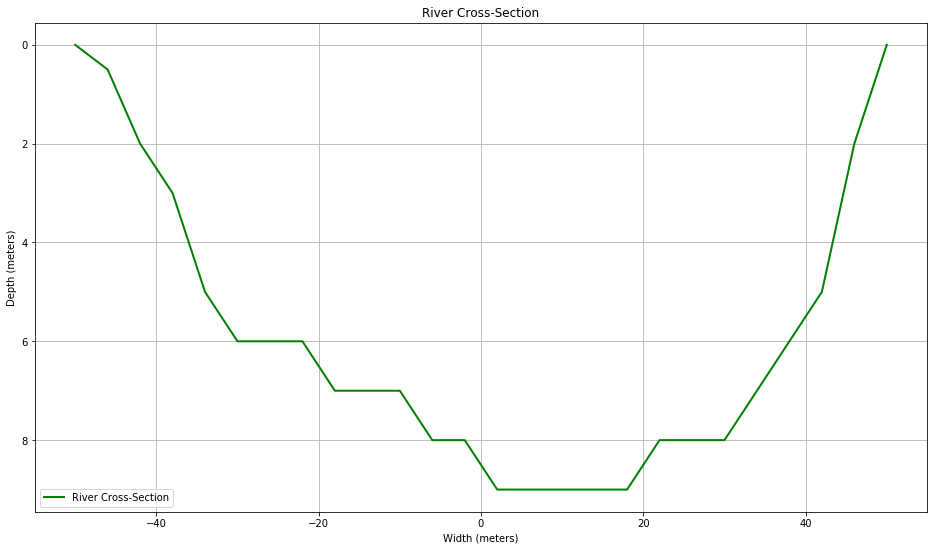

In [40]:
# Add a third section
section_title = "3. Cross-section Cottica River"
story.append(Paragraph(section_title, section_heading_style))

# Add content to the section
section_content = ""
story.append(Paragraph(section_content, styles["Normal"]))

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(16,9))

# Plot the river cross-section
width_points = np.linspace(-river_width / 2, river_width / 2, len(depth_data))
ax.plot(width_points, depth_data, label='River Cross-Section', color='g', linewidth=2)

# Add labels and a legend
ax.set_xlabel('Width (meters)')
ax.set_ylabel('Depth (meters)')
ax.set_title('River Cross-Section')
ax.legend()

# Show the plot
plt.grid(True)
plt.gca().invert_yaxis()  # Invert y-axis to represent depth correctly
plt.show()

# Save the plot as an image in memory
plot_filename = "Channel_cross_section.png"
fig.savefig(plot_filename, format='png')
plt.close()


# Create an Image element from the plot image
plot_image = Image(plot_filename, width=500, height=300)

story.append(plot_image)

## Cross-section Governing Ship

When the channel is not rectengular, but e.g. trapezoidal, the width, b, is equal to the width at the water surface, but the depth, h, is to be used is Ac/b.

7.785


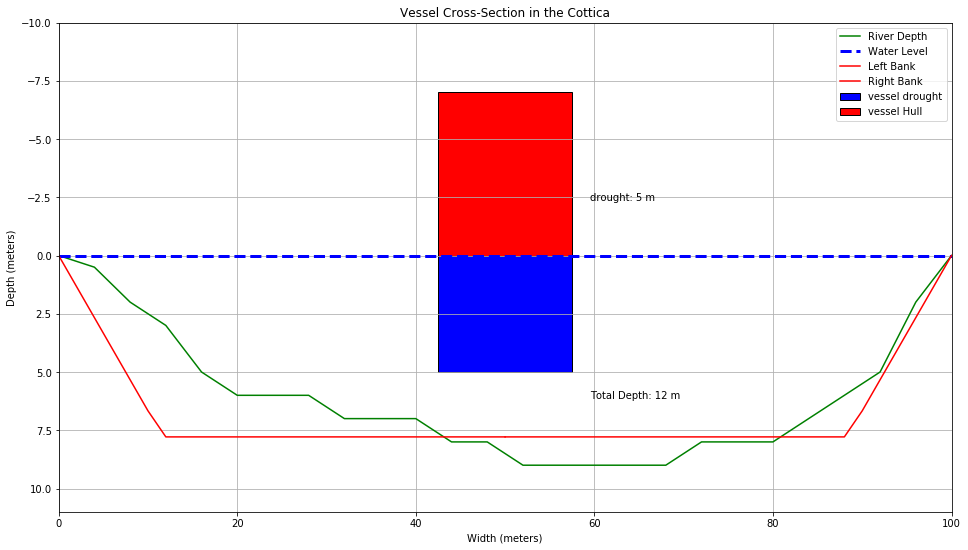

In [41]:
# Add another section
section_title = "4. Cross-section governing ship"
story.append(Paragraph(section_title, section_heading_style))

# Add content to the section
section_content = "When the channel is not rectengular, but e.g. trapezoidal, the width, b, is equal to the width at the water surface, but the depth, h, is to be used is Ac/b."
story.append(Paragraph(section_content, styles["Normal"]))
story.append(Spacer(1, 12))

# Water level
water_level = 0  # meters
num_points = 26

# Horizontal position of the vessel in the river (change this to adjust position)
vessel_position = 50  # meters from the left bank

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(16,9))

# Plot the river depth profile
ax.plot(np.linspace(0, river_width, num_points), depth_data, color='g', label='River Depth')

# Calculate vessel's left and right coordinates based on the vessel position
vessel_left = vessel_position - vessel_width / 2
vessel_right = vessel_position + vessel_width / 2

# Create a polygon to represent the vessel's drought (below water level)
vessel_drought_polygon = Polygon([
    [vessel_left, water_level + vessel_drought],
    [vessel_right, water_level + vessel_drought],
    [vessel_right, water_level],
    [vessel_left, water_level]
], closed=True, facecolor='blue', edgecolor='black', label='vessel drought')

# Create a polygon to represent the rest of the vessel's hull (above water level)
vessel_hull_polygon = Polygon([
    [vessel_left, water_level],
    [vessel_right, water_level],
    [vessel_right, water_level - vessel_total_height + vessel_drought],
    [vessel_left, water_level - vessel_total_height + vessel_drought]
], closed=True, facecolor='red', edgecolor='black', label='vessel Hull')

# Add the vessel polygons to the plot
ax.add_patch(vessel_drought_polygon)
ax.add_patch(vessel_hull_polygon)

# Label the vessel's total depth and drought
ax.text(river_width / 2 + vessel_width / 2 + 2, water_level + vessel_total_height / 2, f'Total Depth: {vessel_total_height} m', verticalalignment='center')
ax.text(river_width / 2 + vessel_width / 2 + 2, water_level - vessel_drought / 2, f'drought: {vessel_drought} m', verticalalignment='center')

# Add a horizontal line for the water level
ax.axhline(y=water_level, color='blue', linestyle='--', linewidth = 3, label='Water Level')

# Simplified River parameters
bottom_width = river_width - (2*9*1.5)
A_c_S = (river_width + bottom_width)/2 * river_depth
river_depth_S = A_c_S/river_width    # meters
print(river_depth_S)
bank_slope_S = 1/1.5   # Slope of the riverbanks (1 vertical unit change for every 2 horizontal units)

# Generate a simplified river depth profile with sloped banks on both sides
num_points_S = 26
half_width_S = river_width / 2
x_left_S = np.linspace(0, half_width_S, num_points_S)
x_right_S = np.linspace(half_width_S, river_width, num_points_S)
depth_left_S = bank_slope_S * x_left_S  # Left bank slope
depth_right_S = bank_slope_S * (river_width- x_right_S)  # Right bank slope

# Simplified clip depth values to the maximum depth (9 meters)
depth_left_S = np.clip(depth_left_S, 0, river_depth_S)
depth_right_S = np.clip(depth_right_S, 0, river_depth_S)


# Plot the river depth profile with sloped banks on both sides
ax.plot(x_left_S, depth_left_S, color='r', label='Left Bank')
ax.plot(x_right_S, depth_right_S, color='r', label='Right Bank')

# Add labels and a legend
ax.set_xlabel('Width (meters)')
ax.set_ylabel('Depth (meters)')
ax.set_title('Vessel Cross-Section in the Cottica')
ax.legend()

# Show the plot
plt.xlim(0, river_width)
plt.ylim(-10, max(depth_data) + 2)  # Set y-axis limits
plt.gca().invert_yaxis()  # Invert y-axis to represent depth correctly
plt.grid(True)
plt.show()


# Save the plot as an image in memory
plot_filename = "Ship.png"
fig.savefig(plot_filename, format='png')
plt.close()


# Create an Image element from the plot image
plot_image = Image(plot_filename, width=500, height=300)

story.append(plot_image)


## Primary Waves

Determine the water-level depression (z) and the return_current (u_r)
\begin{equation}
A_{result} \quad = \quad \frac{A_s}{A_c}
\\
\\
\frac{v_s^2}{g*h} \quad = \quad \frac{\frac{2*z}{h}}{(1 - A_{result} \quad - \frac{z}{h})^{-2} - 1}
\\
\\
\frac{u_r}{\sqrt{g*h}} \quad  =  \quad (\frac{1}{1 - A_{result} \quad - \frac{z}{h}} - 1) * \frac{v_s}{\sqrt{g*h}}
\end{equation}

In [42]:
# Add another section
section_title = "5. Primary Waves"
story.append(Paragraph(section_title, section_heading_style))

# Add content to the section
section_content = ""
story.append(Paragraph(section_content, styles["Normal"]))
story.append(Spacer(1, 12))

data = [
    ["Parameter","Formula", "Value", "Unit"],
    ["A_c", "V_d * V_w", "778", "m^2"],
    ["A_s", "(W + W_bottom)/2 * h","75", "m^2"],
    ["A_block", "A_s/A_c","0.10" ,"[-]"],
#     ["Vessel width", "15", "m"],
#     ["Vessel length", "120", "m"],
#     ["Vessel total height", "12", "m"],
#     ["Vessel drought", "5", "m"],
]
table = Table(data)

table.setStyle(table_style)
story.append(table) 

# # Initialize the area above the draft level
# A_c = 0

# # Calculate the cross-sectional area of the river
# for i in range(len(depth_data) - 1):
#     x1, x2 = i, i + 1
#     d1, d2 = depth_data[x1], depth_data[x2]

#     delta_x = river_width / (len(depth_data) - 1)
    
#     if d1 >= vessel_drought:
#         A_c += delta_x * (d1 - vessel_drought)
#     elif d2 >= vessel_drought:
#         intersection_width = (vessel_drought - d1) / (d2 - d1) * delta_x
#         A_c += intersection_width * (d2 - vessel_drought)

# # Output the result
# print(f"Cross-Sectional Area above vessel's Drought: {A_c:.0f} square meters")
print(f"Simplified cross-Sectional Area above vessel's Drought: {A_c_S:.0f} square meters")

#calculate the wet cross-sectional area of the vessel
A_s = vessel_drought * vessel_width
print(f"Cross-Sectional Area of vessel: {A_s} square meters")

# A_block = A_s/A_c
A_block_S = A_s/A_c_S
# print(f"Blocking area: {A_block:.2f} square meters")
print(f"Simplified blocking area: {A_block_S:.2f} square meters")

Simplified cross-Sectional Area above vessel's Drought: 778 square meters
Cross-Sectional Area of vessel: 75 square meters
Simplified blocking area: 0.10 square meters


### Water-level depression (z)

According to Schiereck (2019) the water-level depression as a function of the storage can be determined by means of graphs. 

With the known blockage factor, As/Ac, the limit speed can be read from figure 9-4.
By means of figure 9-6, the water-level depression can then be determined.  

In [43]:
# Add another section
sub_section_title = "5.1 Water-level depression (z)"
story.append(Paragraph(sub_section_title, sub_section_heading_style))

# Add content to the section
sub_section_content = ""
story.append(Paragraph(sub_section_content, styles["Normal"]))
story.append(Spacer(1, 12))

# h = river_depth_S
h = river_depth
V_s = vessel_speed/3.6 # km/h to m/s|
print(vessel_speed)
V_l = 0.12 * np.sqrt(g*h)
print(f"limit speed of the vessel V_l: {V_l:.2f} m/s")
V_s = 0.9 * V_l    #design speed
print(f"design speed of the vessel V_s: {V_s:.2f} m/s")

# from figure 9-6
z = 0.08 * h

print(f"Resulting water-level depression z: {z:.2f} m")

18.5
limit speed of the vessel V_l: 1.13 m/s
design speed of the vessel V_s: 1.01 m/s
Resulting water-level depression z: 0.72 m


### return current (u_r)

According to the MAS (Maritieme Autoriteit Suriname), the vessel sails in the middel of the river.

In [44]:
# Add another section
sub_section_title = "5.2 Return current (u_r)"
story.append(Paragraph(sub_section_title, sub_section_heading_style))

# Add content to the section
sub_section_content = ""
story.append(Paragraph(sub_section_content, styles["Normal"]))
story.append(Spacer(1, 12))

u_r = (1/(1-A_block_S-z/h)-1)*(V_s/np.sqrt(g*h))*np.sqrt(g*h)

u_r1 = 0.13 * np.sqrt(g*h)

print(f"Resulting return current: {u_r:.2f} m/s")
print(f"Resulting return current: {u_r1:.2f} m/s")

Resulting return current: 0.22 m/s
Resulting return current: 1.22 m/s


### Determine the stone size resulting from the primary waves

The stern wave usually leads to larger stone sizes than the return flow. The stone class can be determined by Hudson's formula:

\begin{equation}
\frac{z}{Δd_{n50}} \quad = \quad 1.8 (cot(α))^{0.33}
\end{equation}

In [45]:
# Add another section
sub_section_title = "5.3 Determine the stone class resulting from the primary waves"
story.append(Paragraph(sub_section_title, sub_section_heading_style))

# Add content to the section
sub_section_content = ""
story.append(Paragraph(sub_section_content, styles["Normal"]))
story.append(Spacer(1, 12))

Δ = 1.65

d_prim = z / (1.65 * 1.8 * (sp.cot(α))**0.33)

print(f"Required grain size to protect against the primary waves d_n50: {d_prim:.2f} m")

Required grain size to protect against the primary waves d_n50: 0.14 m


## Secondary Waves

Determine the wave heights and the required grain size of the armour protection

In [46]:
# Add another section
section_title = "6. Secondary Waves"
story.append(Paragraph(section_title, section_heading_style))

# Add content to the section
section_content = ""
story.append(Paragraph(section_content, styles["Normal"]))
story.append(Spacer(1, 12))
V_s = 18.5/3.6

Froude = (V_s/(np.sqrt(g*h)))
print(f"Froude: {Froude:.2f}")

H = (ζ * (s/h)**(-1/3)* Froude**4)*h 

print(f"Wave height: {H:.6f} m")



Froude: 0.55
Wave height: 0.488003 m


For Froude < 0.75, the secondary waves can be considered deep water waves. Hence, the wave period and length can be calculated.

The angle between the wave propagation line and the sailing line is 35 degrees for deep water waves.

In [47]:
T = np.cos((35*np.pi)/180)* V_s * 2*np.pi/g    #Wave period
L_0 = (g * T**2) / (2 * pi)                    # Wave length
s_w = H/L_0                                    # Wave steepness

ξ = np.tan(α)/np.sqrt(s_w)                     # Iribarren number

print(f"Wave period: {T:.2f} s")
print(f"Wave length: {L_0:.2f} m")
print(f"Wave steepness: {s_w:.4f}")

print(f"Iribarren number: {ξ:.2f}")

Wave period: 2.70 s
Wave length: 11.35 m
Wave steepness: 0.0430
Iribarren number: 0.98


### Determine the stone size resulting from the secondary waves

\begin{equation}
\frac{H}{Δd_{n50}} \quad = \quad C_{2nd} \quad * \quad ξ^{0.5}
\\
\\
C_{2nd} \quad = \quad 1.6 (cot(α))^{0.33} 
\end{equation}

In [48]:
# Add another section
sub_section_title = "6.1 Determine the stone class resulting from the secondary waves"
story.append(Paragraph(sub_section_title, sub_section_heading_style))

# Add content to the section
sub_section_content = ""
story.append(Paragraph(sub_section_content, styles["Normal"]))
story.append(Spacer(1, 12))


Δ = 1.65

C_2nd = 1.6 * (sp.cot(α))**0.33

d_sec = H/(C_2nd * ξ**-0.5) / Δ

print(f"Required grain size to protect against the secondary waves d_n50: {d_sec:.2f} m")

Required grain size to protect against the secondary waves d_n50: 0.11 m


# Rock Armour Design

In inland waterways the primary wave is often dominant, which is also the case in the Cottica river. 

# Generate PDF document

In [ ]:
# Close the PDF document
# c.save()

# # Build the PDF document
# doc.build(story)

# from pdf2image import convert_from_path
# from IPython.display import display

# # Path to your PDF file
# pdf_file = '/Users/tomh/Documents/My Documents/MSc. Hydraulic Engineering/Multidisciplinary Project/Ricanau_Mofo.pdf'

# # Convert PDF to a list of images
# images = convert_from_path(pdf_file)

# # Display each image in the Jupyter Notebook
# for i, image in enumerate(images):
#     display(image)